# Limpio

In [1]:
import numpy as np
from tensorflow.keras.utils import to_categorical
import keras 
from keras import layers
from keras.datasets import fashion_mnist
from sklearn.metrics import classification_report

In [2]:
import matplotlib.pyplot as plt

def plot(axis, train, validation, title):
    # We create a list of epoch numbers from 1 to the length of the training set
    epochs = range(1, len(train) + 1)
    # Graph of the training data with a solid blue line
    axis.plot(epochs, train, 'b-o', label='Training ' + title)
    # Graph of the validation data with a red dashed line
    axis.plot(epochs, validation, 'r--o', label='Validation '+ title)
    # We set the title of the graph, the X and Y axis labels
    axis.set_title('Training and validation ' + title)
    axis.set_xlabel('Epochs')
    axis.set_ylabel(title)
    # We show the legend of the graph
    axis.legend()    

def multiplot(history):
    fig, axes = plt.subplots(1, 2)
    fig.set_figwidth(11)
    plot(axes[0], history.history['loss'], history.history['val_loss'], 'loss')
    plot(axes[1], history.history['accuracy'], history.history['val_accuracy'], 'accuracy')

    # We show the graphs on screen
    plt.show()

## Data preprocessing

In [3]:
# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
'Train data'
# Reshape the images to vectors of size 784 (28*28)
train_images = train_images.reshape((60000, 28*28))
test_images = test_images.reshape((10000, 28*28))
# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# One-hot encode the labels
train_labels = to_categorical(train_labels)

'Validation data separation'
val_images = train_images[:10000]
val_labels = train_labels[:10000]
train_images = train_images[10000:]
train_labels = train_labels[10000:]

print("Data ready. Training set size:", train_images.shape)

Data ready. Training set size: (50000, 784)


## Neural Network setup

In [4]:
def build_model(n_layers = 2, 
                n_per_layer = 50, 
                layer_act_func = 'sigmoid', 
                output_act_func = 'softmax',
                learning_rate = 0.001,
                loss_function = "categorical_crossentropy",
                metrics = ["accuracy"],
                epochs = 25,
                batch_size = 512):
    
    '''Builds and trains a feedforward neural network on the Fashion MNIST dataset.'''
    # Neural network setup
    _model = keras.Sequential(name='model')
    _model.add(layers.Input(shape=(28*28, )))
    for _lay in range(n_layers):
        _model.add(layers.Dense(n_per_layer, activation = layer_act_func)) 
    _model.add(layers.Dense(10, name = 'output', activation = output_act_func))
    _model.summary()
    # Training setup
    _opt = keras.optimizers.Adam(learning_rate = learning_rate)
    _model.compile(optimizer = _opt, loss = loss_function, metrics = metrics)
    _history = _model.fit(train_images,
                          train_labels,
                          epochs = epochs,
                          batch_size = batch_size,
                          validation_data = (val_images, val_labels))
    return _model, _history

## Reports and evaluation

In [5]:
def print_report(model):
    '''Generates and prints a classification report for the given model on the test dataset.'''
    # Predict the classes for the test set
    predictions = model.predict(test_images)
    predicted_classes = np.argmax(predictions, axis=1)
    # Generate the classification report
    report = classification_report(test_labels, predicted_classes, target_names = ['T-shirt/top', 
                                                                                    'Trouser', 
                                                                                    'Pullover', 
                                                                                    'Dress', 
                                                                                    'Coat', 
                                                                                    'Sandal', 
                                                                                    'Shirt', 
                                                                                    'Sneaker', 
                                                                                    'Bag', 
                                                                                    'Ankle boot'])
    # Print the evaluation metrics
    print ("Classification Report:")
    print (report)

## Testing different models

In [6]:
'Base model with relu activation'
relu_model, relu_history = build_model(
                                        n_layers = 2, 
                                        n_per_layer = 50, 
                                        layer_act_func = 'relu', 
                                        output_act_func = 'softmax',
                                        learning_rate = 0.001,
                                        loss_function = "categorical_crossentropy",
                                        metrics = ["accuracy"],
                                        epochs = 30,
                                        batch_size = 400
                                    )

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.7296 - loss: 0.8212 - val_accuracy: 0.8216 - val_loss: 0.5244
Epoch 2/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8344 - loss: 0.4818 - val_accuracy: 0.8455 - val_loss: 0.4447
Epoch 3/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8502 - loss: 0.4332 - val_accuracy: 0.8553 - val_loss: 0.4151
Epoch 4/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8592 - loss: 0.4043 - val_accuracy: 0.8591 - val_loss: 0.4066
Epoch 5/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8606 - loss: 0.3959 - val_accuracy: 0.8609 - val_loss: 0.3885
Epoch 6/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8669 - loss: 0.3768 - val_accuracy: 0.8650 - val_loss: 0.3781
Epoch 7/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8722 - loss: 0.3603 - val_accuracy: 0.8668 - val_loss: 0.3781
Epoch 8/30
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8755 - loss: 0.3516 - val_accuracy: 0

In [15]:
'Model with less epochs'
less_epochs_model, less_epochs_history = build_model(
                                        n_layers = 2,
                                        n_per_layer = 50,
                                        layer_act_func = 'relu',
                                        output_act_func = 'softmax',
                                        learning_rate = 0.001,
                                        loss_function = "categorical_crossentropy",
                                        metrics = ["accuracy"],
                                        epochs = 20,
                                        batch_size = 400
                                    )

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,310 (165.27 KB)

 Trainable params: 42,310 (165.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7252 - loss: 0.8314 - val_accuracy: 0.8212 - val_loss: 0.5358
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8298 - loss: 0.4952 - val_accuracy: 0.8401 - val_loss: 0.4665
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8461 - loss: 0.4412 - val_accuracy: 0.8511 - val_loss: 0.4373
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8552 - loss: 0.4133 - val_accuracy: 0.8510 - val_loss: 0.4240
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8601 - loss: 0.3979 - val_accuracy: 0.8562 - val_loss: 0.3995
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8675 - loss: 0.3766 - val_accuracy: 0.8630 - val_loss: 0.3882
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8690 - loss: 0.3664 - val_accuracy: 0.8642 - val_loss: 0.3865
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8735 - loss: 0.3551 - val_accuracy: 0.

In [8]:
'Model with more layers'
more_layers_model, more_layers_history = build_model(
                                        n_layers = 4,
                                        n_per_layer = 50,
                                        layer_act_func = 'relu',
                                        output_act_func = 'softmax',
                                        learning_rate = 0.001,
                                        loss_function = "categorical_crossentropy",
                                        metrics = ["accuracy"],
                                        epochs = 20,
                                        batch_size = 400
                                    )

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,410 (185.20 KB)

 Trainable params: 47,410 (185.20 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6960 - loss: 0.8891 - val_accuracy: 0.8114 - val_loss: 0.5320
Epoch 2/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8303 - loss: 0.4822 - val_accuracy: 0.8460 - val_loss: 0.4416
Epoch 3/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8490 - loss: 0.4281 - val_accuracy: 0.8476 - val_loss: 0.4268
Epoch 4/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8548 - loss: 0.4065 - val_accuracy: 0.8599 - val_loss: 0.3902
Epoch 5/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8652 - loss: 0.3784 - val_accuracy: 0.8639 - val_loss: 0.3828
Epoch 6/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8701 - loss: 0.3588 - val_accuracy: 0.8664 - val_loss: 0.3681
Epoch 7/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8735 - loss: 0.3511 - val_accuracy: 0.8692 - val_loss: 0.3598
Epoch 8/20
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8745 - loss: 0.3445 - val_accuracy: 0.

In [11]:
'Model with 4 layers and 100 neurons per layer'
more_neurons_model, more_neurons_history = build_model(
                                        n_layers = 4,
                                        n_per_layer = 100,
                                        layer_act_func = 'relu',
                                        output_act_func = 'softmax',
                                        learning_rate = 0.001,
                                        loss_function = "categorical_crossentropy",
                                        metrics = ["accuracy"],
                                        epochs = 15,
                                        batch_size = 350
                                    )

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,810 (428.95 KB)

 Trainable params: 109,810 (428.95 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7582 - loss: 0.6976 - val_accuracy: 0.8375 - val_loss: 0.4534
Epoch 2/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8460 - loss: 0.4334 - val_accuracy: 0.8588 - val_loss: 0.4008
Epoch 3/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8591 - loss: 0.3887 - val_accuracy: 0.8540 - val_loss: 0.3971
Epoch 4/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8728 - loss: 0.3498 - val_accuracy: 0.8712 - val_loss: 0.3554
Epoch 5/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8803 - loss: 0.3297 - val_accuracy: 0.8794 - val_loss: 0.3289
Epoch 6/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8855 - loss: 0.3111 - val_accuracy: 0.8791 - val_loss: 0.3312
Epoch 7/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8916 - loss: 0.2944 - val_accuracy: 0.8820 - val_loss: 0.3245
Epoch 8/15
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8933 - loss: 0.2917 - val_accuracy: 0

### Reports

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.83      0.85      0.84      1000
     Trouser       0.98      0.98      0.98      1000
    Pullover       0.77      0.81      0.79      1000
       Dress       0.88      0.90      0.89      1000
        Coat       0.81      0.81      0.81      1000
      Sandal       0.97      0.96      0.96      1000
       Shirt       0.73      0.67      0.70      1000
     Sneaker       0.93      0.96      0.94      1000
         Bag       0.98      0.96      0.97      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.88      0.89      0.88     10000
weighted avg       0.88      0.89      0.88     10000



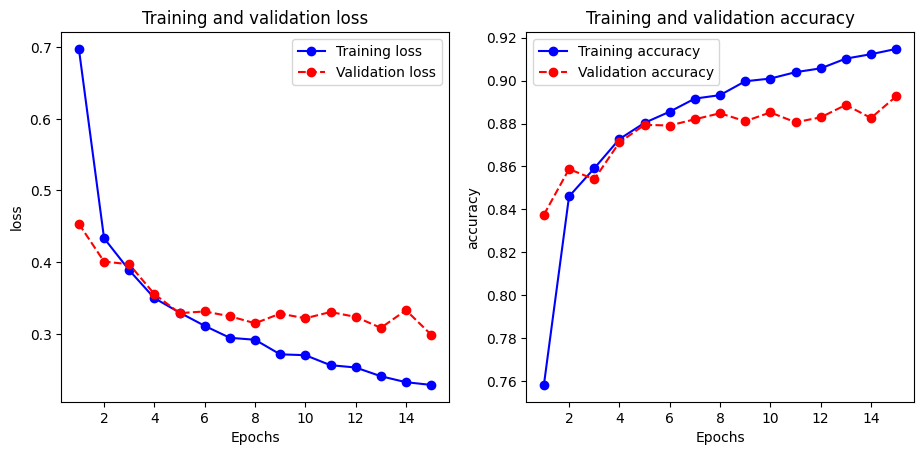

In [12]:
'2 layers'
# print_report(relu_model)
# print_report(less_epochs_model)

'4 layers'
# print_report(more_layers_model)
print_report(more_neurons_model)
multiplot(more_neurons_history)

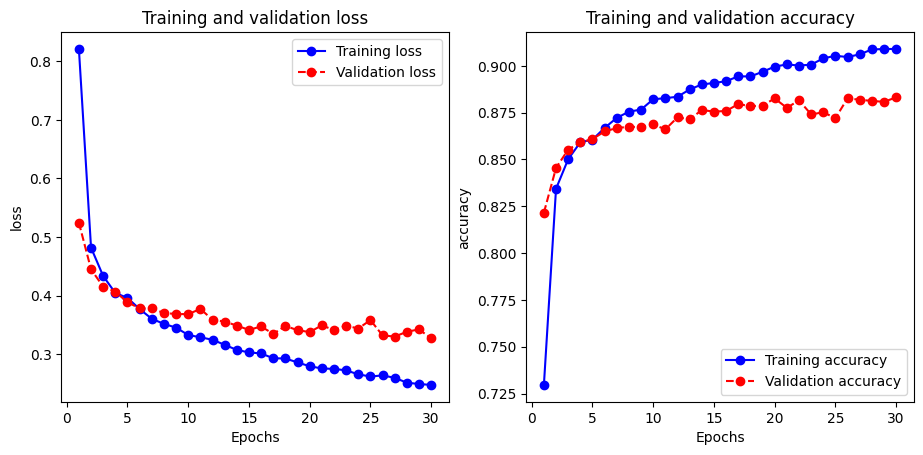

In [13]:
multiplot(relu_history)

# Regularization

Model: "model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,610 (350.04 KB)

 Trainable params: 89,610 (350.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7096 - loss: 0.8103 - val_accuracy: 0.8290 - val_loss: 0.4776
Epoch 2/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8219 - loss: 0.5058 - val_accuracy: 0.8490 - val_loss: 0.4177
Epoch 3/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8369 - loss: 0.4532 - val_accuracy: 0.8619 - val_loss: 0.3863
Epoch 4/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8476 - loss: 0.4209 - val_accuracy: 0.8670 - val_loss: 0.3634
Epoch 5/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8551 - loss: 0.4008 - val_accuracy: 0.8687 - val_loss: 0.3571
Epoch 6/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8606 - loss: 0.3867 - val_accuracy: 0.8705 - val_loss: 0.3427
Epoch 7/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8667 - loss: 0.3717 - val_accuracy: 0.8737 - val_loss: 0.3419
Epoch 8/40
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8690 - loss: 0.3644 - val_accuracy: 0.

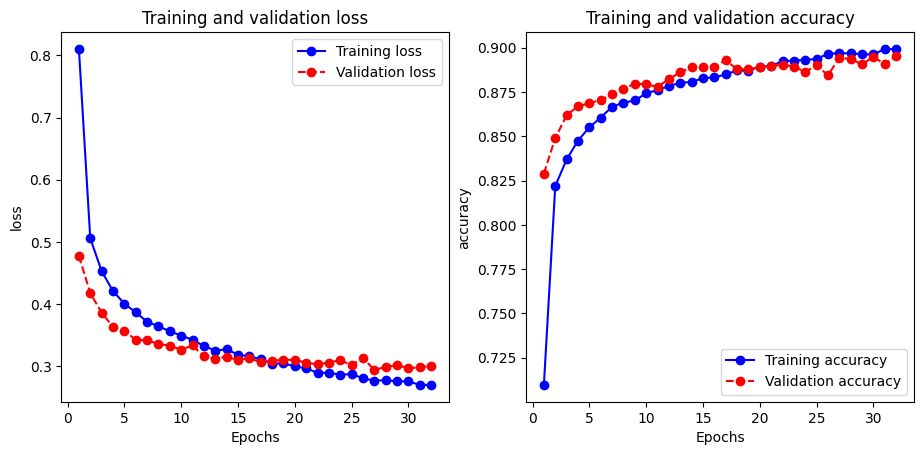

In [19]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True)


model = keras.Sequential(name='model')
'Input Layer'
model.add(layers.Input(shape=(28*28, )))

'Layer 1'
model.add(layers.Dense(100, activation = 'relu')) 
# model.add(layers.Activation('relu')) # 
model.add(layers.Dropout(0.3)) 
'Layer 2'
model.add(layers.Dense(100, activation = 'relu')) 
# model.add(layers.Activation('relu')) # 
model.add(layers.Dropout(0.3))

'Output Layer'
model.add(layers.Dense(10, name = 'output', activation = 'softmax'))
model.summary()

# Training setup
opt = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ["accuracy"])
history = model.fit(train_images,
                        train_labels,
                        epochs = 40,
                        batch_size = 200,
                        validation_data = (val_images, val_labels),
                        callbacks=[early_stop], # Adding "Red List Toping"
                        verbose=1) # Verbose 1 to see training progress
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print_report(model)
multiplot(history)

c:\Users\pedro\anaconda3\envs\QML\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Final Model with Early Stopping...
Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.7943 - loss: 0.5835 - val_accuracy: 0.8539 - val_loss: 0.4074
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8485 - loss: 0.4224 - val_accuracy: 0.8652 - val_loss: 0.3779
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8633 - loss: 0.3789 - val_accuracy: 0.8764 - val_loss: 0.3436
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8697 - loss: 0.3575 - val_accuracy: 0.8735 - val_loss: 0.3422
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8786 - loss: 0.3374 - val_accuracy: 0.8617 - val_loss: 0.3737
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8835 - loss: 0.3193 - val_accuracy: 0.8763 - val_loss: 0.3313
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8848 - loss: 0.3091 - val_accuracy: 0.8627 - val_loss: 0.3618
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step

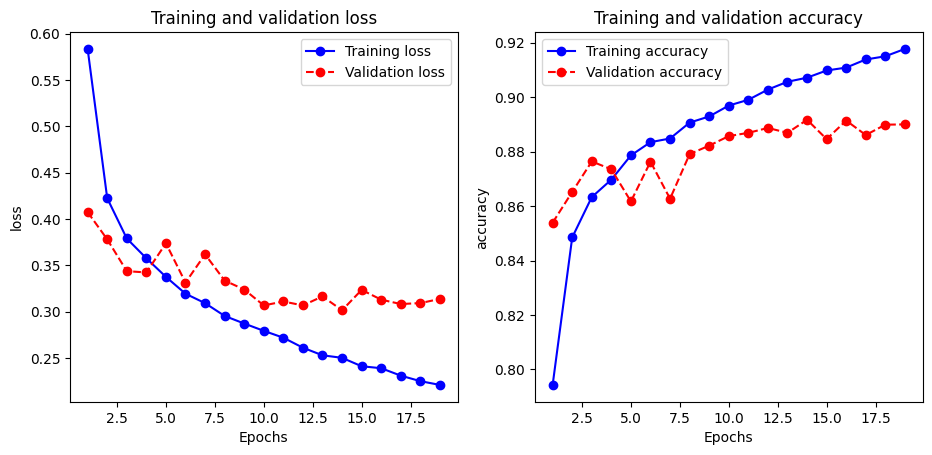

In [ ]:
# --- CELL: Final Combined Model (Modelo 'Zen' / 'Seten') ---
# Combining Dropout + Batch Norm + Early Stopping [cite: 95]

from keras.callbacks import EarlyStopping

# Define Early Stopping ("Red List Toping")
# Monitor val_loss, stop if no improvement for 5 epochs, restore best weights
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5, restore_best_weights=True)

def build_final_model():
    model = keras.Sequential(name='model')
    
    # Layer 1
    model.add(layers.Dense(256, input_shape=(28 * 28,)))
    model.add(layers.BatchNormalization()) # Normalize
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.3))         # Regularize
    
    # Layer 2
    model.add(layers.Dense(128))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.Dropout(0.3))
    
    # Output
    model.add(layers.Dense(10, activation='softmax'))
    return model

model_final = build_final_model()
model_final.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Training Final Model with Early Stopping...")
history_final = model_final.fit(train_images,
                                train_labels,
                                epochs=50, # Set high, Early Stopping will kill it when ready
                                batch_size=128,
                                validation_data=(val_images, val_labels),
                                callbacks=[early_stop], # Adding "Red List Toping"
                                verbose=1)

multiplot(history_final)